In [44]:
import pandas as pd 
import numpy as np 
import seaborn as sns 
import matplotlib.pyplot as plt 
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn import svm

In [45]:
loan = pd.read_csv("K:\DATA SCIENCE\DataSets\Loan Data.csv")

In [46]:
loan.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [47]:
loan.shape

(614, 13)

In [48]:
loan.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


In [49]:
loan.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [50]:
loan.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [51]:
loan = loan.dropna()

In [52]:
loan.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

In [53]:
label = LabelEncoder()

In [54]:
# loan['Gender'] = label.fit_transform(loan['Gender'])
# loan['Married'] = label.fit_transform(loan['Married'])
# loan['Education'] = label.fit_transform(loan['Education'])
# loan['Self_Employed'] = label.fit_transform(loan['Self_Employed'])
# loan['Property_Area'] = label.fit_transform(loan['Property_Area'])
#loan['Loan_Status'] = label.fit_transform(loan['Loan_Status'])

In [56]:
loan['Dependents'].value_counts()

Dependents
0     274
2      85
1      80
3+     41
Name: count, dtype: int64

In [57]:
loan['Dependents'] = label.fit_transform(loan['Dependents'])

In [58]:
loan['Dependents'].value_counts()

Dependents
0    274
2     85
1     80
3     41
Name: count, dtype: int64

<Axes: xlabel='Education', ylabel='count'>

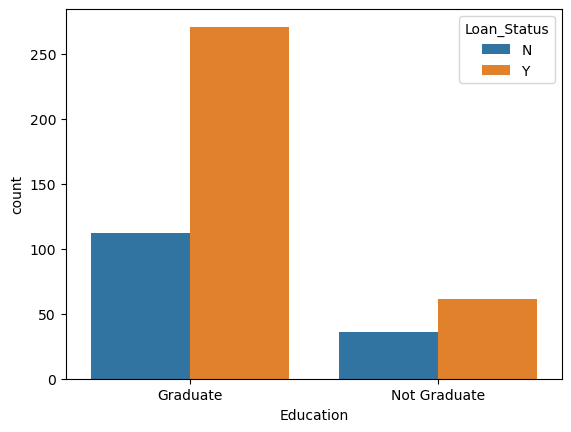

In [59]:
sns.countplot(x =loan['Education'], hue= loan['Loan_Status'])

<Axes: xlabel='Married', ylabel='count'>

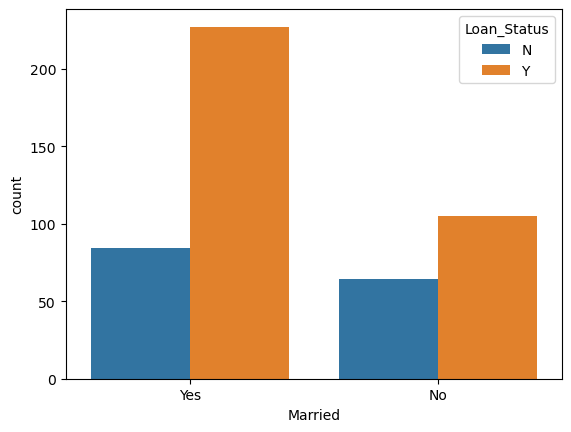

In [60]:
sns.countplot(x =loan['Married'], hue= loan['Loan_Status'])

In [61]:
loan['Gender'] = label.fit_transform(loan['Gender'])
loan['Married'] = label.fit_transform(loan['Married'])
loan['Education'] = label.fit_transform(loan['Education'])
loan['Self_Employed'] = label.fit_transform(loan['Self_Employed'])
loan['Property_Area'] = label.fit_transform(loan['Property_Area'])
loan['Loan_Status'] = label.fit_transform(loan['Loan_Status'])

In [62]:
loan.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
1,LP001003,1,1,1,0,0,4583,1508.0,128.0,360.0,1.0,0,0
2,LP001005,1,1,0,0,1,3000,0.0,66.0,360.0,1.0,2,1
3,LP001006,1,1,0,1,0,2583,2358.0,120.0,360.0,1.0,2,1
4,LP001008,1,0,0,0,0,6000,0.0,141.0,360.0,1.0,2,1
5,LP001011,1,1,2,0,1,5417,4196.0,267.0,360.0,1.0,2,1


In [66]:
X = loan.drop(['Loan_ID','Loan_Status'],axis = 1)
Y = loan['Loan_Status']

In [68]:
X_train ,X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state=2, stratify=Y)

In [69]:
X.shape,X_train.shape ,X_test.shape

((480, 11), (384, 11), (96, 11))

In [74]:
classifier = svm.SVC(kernel= 'linear')

In [75]:
classifier.fit(X_train, Y_train)

SVC(kernel='linear')

In [76]:
pred_svm = classifier.predict(X_test)

In [77]:
confusion_matrix(Y_test, pred_svm)

array([[14, 16],
       [ 2, 64]], dtype=int64)

In [79]:
cm = accuracy_score(Y_test, pred_svm)*100
print(cm,'%')

81.25 %
